# Overview of this jupyter notebook

1. Load the dataframes
<br>1.1 padding dataframes with zeros
<br>1.2 shuffle and split the data into train and test
2. Preprocess training data
<br>2.1 Data Normalization
<br>2.2 Build feature and label for training and save as .npy
3. Preprocess test data
<br>3.1 Build feature and label for test and save as .npy

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import os
import json
import random
import pickle
import importlib
from library import faps_color as fapsc        # this module contains the color combination of FAPS Institute
print(importlib.reload(fapsc))

<module 'library.faps_color' from 'C:\\Users\\songs\\OneDrive\\Desktop\\0. MA_FAPS\\04_Code\\library\\faps_color.py'>


# 1. Load the dataframes

In [3]:
classes = ['0_in_ordnung',
           '1_kleine_durchgangsbohrung',
           '2_versetzte_fuegepartner',
           '3_unebene_fuegeflaeche',
           '4_span_im_gewinde',
           '5_verschmutzte_schraube',
           '6_fremdkoerper_am_gewindeende',
           '7_beschaedigte_schraube']

In [4]:
df0 = pd.read_pickle("dataframes/df0_v2.pkl")
df1 = pd.read_pickle("dataframes/df1_v2.pkl")
df2 = pd.read_pickle("dataframes/df2_v2.pkl")
df3 = pd.read_pickle("dataframes/df3_v2.pkl")
df4 = pd.read_pickle("dataframes/df4_v2.pkl")
df5 = pd.read_pickle("dataframes/df5_v2.pkl")
df6 = pd.read_pickle("dataframes/df6_v2.pkl")
df7 = pd.read_pickle("dataframes/df7_v2.pkl")

In [5]:
df16 = pd.read_pickle("dataframes/df16_v2.pkl")
df24 = pd.read_pickle("dataframes/df24_v2.pkl")
df27 = pd.read_pickle("dataframes/df27_v2.pkl")
df35 = pd.read_pickle("dataframes/df35_v2.pkl")
df37 = pd.read_pickle("dataframes/df37_v2.pkl")
df267 = pd.read_pickle("dataframes/df267_v2.pkl")
df357 = pd.read_pickle("dataframes/df357_v2.pkl")

In [6]:
df0.shape

(775, 800)

In [7]:
# reduce number of curves from class 0: 800 -> 200
# so that every class has 200 curves each for the classification

df0 = df0[df0.columns[600:]]
df0.columns = range(df0.shape[1])
df0.shape

(775, 200)

In [8]:
len(df0.columns)

200

In [9]:
df0

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.01792,0.00896,0.02688,0.01792,0.00000,0.01344,0.02688,0.02240,0.00000,0.02688,...,0.01792,0.02688,0.00896,0.00896,0.00000,0.01344,0.00448,0.00448,0.03136,0.00896
1,0.01792,0.00896,0.02688,0.01792,0.00000,0.01344,0.02688,0.02240,0.00000,0.02688,...,0.01792,0.02688,0.00896,0.00896,0.00000,0.01344,0.00448,0.00448,0.02688,0.00896
2,0.02240,0.01792,0.01344,0.01792,0.00896,0.00448,0.01792,0.02240,0.00000,0.00896,...,0.00896,0.00896,0.00000,0.00448,0.00448,0.01792,0.00896,0.01344,0.00896,0.01344
3,0.00448,0.00448,0.00448,0.01344,0.00896,0.00448,0.01344,0.00896,0.00448,0.00896,...,0.00000,0.00000,0.00000,0.00000,0.00448,0.01344,0.00896,0.01344,0.00448,0.01344
4,0.01792,0.01792,0.01344,0.01792,0.01792,0.00448,0.01792,0.02240,0.00896,0.00896,...,0.00448,0.00896,0.00000,0.00448,0.00896,0.01792,0.00896,0.01792,0.00896,0.01792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.38080,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
771,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.20160,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
772,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
773,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [10]:
dfs = {"df0":df0, "df1":df1, "df2":df2, "df3":df3, "df4":df4, "df5":df5, "df6":df6, "df7":df7,
       "df16":df16, "df24":df24, "df27":df27, "df35":df35, "df37":df37, "df267":df267, "df357":df357}

In [11]:
for i in dfs:
    print(f"length of {i}: {len(dfs[i])}")

length of df0: 775
length of df1: 931
length of df2: 812
length of df3: 697
length of df4: 803
length of df5: 766
length of df6: 743
length of df7: 748
length of df16: 877
length of df24: 816
length of df27: 774
length of df35: 728
length of df37: 716
length of df267: 778
length of df357: 729


In [12]:
tot_nr_curves = []

for i in dfs:
    print(f"{i} number of curves: {len(dfs[i].columns)}")
    tot_nr_curves.append(len(dfs[i].columns))
    
print(f"tot_nr_curves: {sum(tot_nr_curves)}")

df0 number of curves: 200
df1 number of curves: 200
df2 number of curves: 200
df3 number of curves: 200
df4 number of curves: 200
df5 number of curves: 200
df6 number of curves: 200
df7 number of curves: 200
df16 number of curves: 100
df24 number of curves: 100
df27 number of curves: 100
df35 number of curves: 100
df37 number of curves: 100
df267 number of curves: 100
df357 number of curves: 100
tot_nr_curves: 2300


In [13]:
tot_nr_curves

[200, 200, 200, 200, 200, 200, 200, 200, 100, 100, 100, 100, 100, 100, 100]

## 1.1 padding dataframes with zeros

In [14]:
def zero_padding(df, len_curve):
    
    to_pad = len_curve - len(df)
    zeros = np.zeros(to_pad*len(df.columns)).reshape(to_pad, len(df.columns))
    df_zeros = pd.DataFrame(zeros)    
    df_padded = df.append(df_zeros)
    df_padded = df_padded.reset_index(drop=True)
    
    return df_padded

In [15]:
def pad_df(df, len_curve=920):
    
    if len(df)>len_curve:
        print(f"this dataframe has a length of {len(df)}")
    else:
        df_padded = zero_padding(df, len_curve)
        print(df_padded.shape)
        return df_padded

In [16]:
df0p = pad_df(df0)
df1p = df1[:920]
df2p = pad_df(df2)
df3p = pad_df(df3)
df4p = pad_df(df4)
df5p = pad_df(df5)
df6p = pad_df(df6)
df7p = pad_df(df7)

df1p.shape

(920, 200)
(920, 200)
(920, 200)
(920, 200)
(920, 200)
(920, 200)
(920, 200)


(920, 200)

In [17]:
df16p = pad_df(df16)
df24p = pad_df(df24)
df27p = pad_df(df27)
df35p = pad_df(df35)
df37p = pad_df(df37)
df267p = pad_df(df267)
df357p = pad_df(df357)

(920, 100)
(920, 100)
(920, 100)
(920, 100)
(920, 100)
(920, 100)
(920, 100)


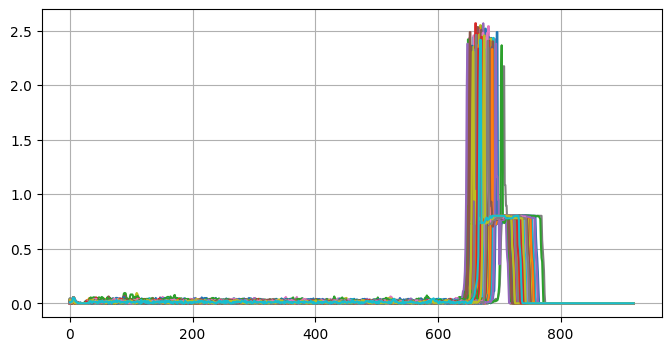

In [18]:
plt.figure(figsize=(8,4))
plt.plot(df0p)
plt.grid()
plt.show()

In [19]:
df0p

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.01792,0.00896,0.02688,0.01792,0.00000,0.01344,0.02688,0.02240,0.00000,0.02688,...,0.01792,0.02688,0.00896,0.00896,0.00000,0.01344,0.00448,0.00448,0.03136,0.00896
1,0.01792,0.00896,0.02688,0.01792,0.00000,0.01344,0.02688,0.02240,0.00000,0.02688,...,0.01792,0.02688,0.00896,0.00896,0.00000,0.01344,0.00448,0.00448,0.02688,0.00896
2,0.02240,0.01792,0.01344,0.01792,0.00896,0.00448,0.01792,0.02240,0.00000,0.00896,...,0.00896,0.00896,0.00000,0.00448,0.00448,0.01792,0.00896,0.01344,0.00896,0.01344
3,0.00448,0.00448,0.00448,0.01344,0.00896,0.00448,0.01344,0.00896,0.00448,0.00896,...,0.00000,0.00000,0.00000,0.00000,0.00448,0.01344,0.00896,0.01344,0.00448,0.01344
4,0.01792,0.01792,0.01344,0.01792,0.01792,0.00448,0.01792,0.02240,0.00896,0.00896,...,0.00448,0.00896,0.00000,0.00448,0.00896,0.01792,0.00896,0.01792,0.00896,0.01792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
916,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
917,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
918,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


## 1.2 shuffle and split the data -> test size: 50 curves each class

In [20]:
def split_df(df):
    
    feature = df.values.transpose()
    x_train, x_test = train_test_split(feature, random_state=9, test_size=50, shuffle=True)
    
    return x_train, x_test

In [21]:
cl0train, cl0test = split_df(df0p)
cl1train, cl1test = split_df(df1p)
cl2train, cl2test = split_df(df2p)
cl3train, cl3test = split_df(df3p)
cl4train, cl4test = split_df(df4p)
cl5train, cl5test = split_df(df5p)
cl6train, cl6test = split_df(df6p)
cl7train, cl7test = split_df(df7p)

In [22]:
cl16train, cl16test = split_df(df16p)
cl24train, cl24test = split_df(df24p)
cl27train, cl27test = split_df(df27p)
cl35train, cl35test = split_df(df35p)
cl37train, cl37test = split_df(df37p)
cl267train, cl267test = split_df(df267p)
cl357train, cl357test = split_df(df357p)

In [23]:
train_list = [cl0train, cl1train, cl2train, cl3train, cl4train, cl5train, cl6train, cl7train, 
              cl16train, cl24train, cl27train, cl35train, cl37train, cl267train, cl357train]

In [24]:
cl0train.shape

(150, 920)

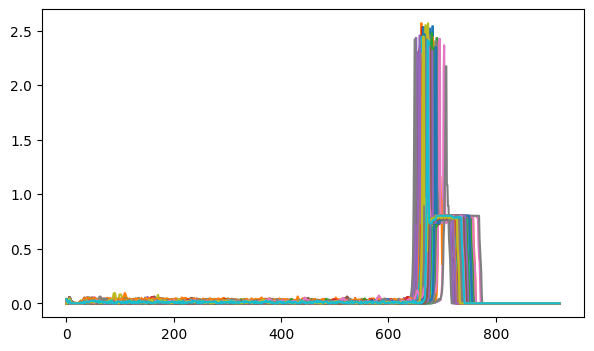

In [25]:
plt.figure(figsize=(7,4))
plt.plot(cl0train.transpose())
plt.show()

# 2. Preprocess training data

## 2.1 Data Normalization

In [26]:
def get_max_train(train_list):
    
    arrays = tuple(train_list)
    feature = np.concatenate(arrays, axis=0)
    max_train = np.max(feature)
    min_train = np.min(feature)
    
    print(f"shape of feature: {feature.shape}")
    return max_train, min_train

In [27]:
max_train, min_train= get_max_train(train_list)
print(max_train)
print(min_train)

shape of feature: (1550, 920)
2.56704
0.0


In [28]:
np.save("dataframes/max_train_v2.npy", max_train)

In [29]:
cl0train_scaled = cl0train/max_train
cl1train_scaled = cl1train/max_train
cl2train_scaled = cl2train/max_train
cl3train_scaled = cl3train/max_train
cl4train_scaled = cl4train/max_train
cl5train_scaled = cl5train/max_train
cl6train_scaled = cl6train/max_train
cl7train_scaled = cl7train/max_train

cl16train_scaled = cl16train/max_train
cl24train_scaled = cl24train/max_train
cl27train_scaled = cl27train/max_train
cl35train_scaled = cl35train/max_train
cl37train_scaled = cl37train/max_train
cl267train_scaled = cl267train/max_train
cl357train_scaled = cl357train/max_train

In [30]:
cl0train_inverse = cl0train_scaled*max_train
cl1train_inverse = cl1train_scaled*max_train
cl2train_inverse = cl2train_scaled*max_train
cl3train_inverse = cl3train_scaled*max_train
cl4train_inverse = cl4train_scaled*max_train
cl5train_inverse = cl5train_scaled*max_train
cl6train_inverse = cl6train_scaled*max_train
cl7train_inverse = cl7train_scaled*max_train

cl16train_inverse = cl16train_scaled*max_train
cl24train_inverse = cl24train_scaled*max_train
cl27train_inverse = cl27train_scaled*max_train
cl35train_inverse = cl35train_scaled*max_train
cl37train_inverse = cl37train_scaled*max_train
cl267train_inverse = cl267train_scaled*max_train
cl357train_inverse = cl357train_scaled*max_train

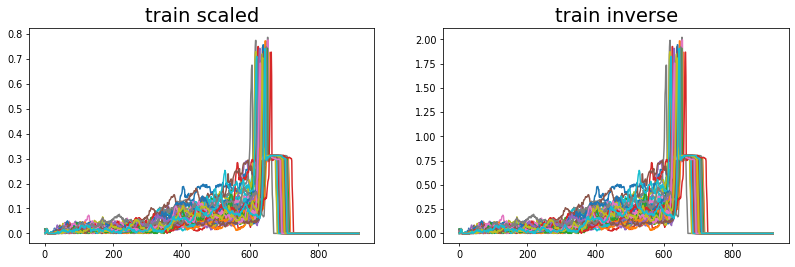

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(14,4), dpi=70)
axs[0].plot(cl357train_scaled.transpose())
axs[1].plot(cl357train_inverse.transpose())

axs[0].set_title("train scaled", fontsize=20)
axs[1].set_title("train inverse", fontsize=20)
fig.show()

In [32]:
cl0train_scaled.shape

(150, 920)

## 2.2 Build feature and label for training and save as .npy

In [33]:
feature_train = np.concatenate((cl0train_scaled, cl1train_scaled, cl2train_scaled, cl3train_scaled, cl4train_scaled,
                                cl5train_scaled, cl6train_scaled, cl7train_scaled, 
                                cl16train_scaled, cl24train_scaled, cl27train_scaled, cl35train_scaled, cl37train_scaled,
                                cl267train_scaled, cl357train_scaled), axis=0)
feature_train.shape

(1550, 920)

In [34]:
def build_multi_label(shape_list, p0=None, p1=None, p2=None):
    
    label = np.zeros(shape_list[0]*shape_list[1]).reshape(shape_list[0], shape_list[1])
    
    if p0 is not None:
        label[:, p0] = 1
    if p1 is not None:
        label[:, p1] = 1
    if p2 is not None:
        label[:, p2] = 1
    
    return label

In [35]:
class_amount = 8
l0train = build_multi_label(shape_list=[cl0train_scaled.shape[0],class_amount], p0=0)
l1train = build_multi_label(shape_list=[cl1train_scaled.shape[0],class_amount], p0=1)
l2train = build_multi_label(shape_list=[cl2train_scaled.shape[0],class_amount], p0=2)
l3train = build_multi_label(shape_list=[cl3train_scaled.shape[0],class_amount], p0=3)
l4train = build_multi_label(shape_list=[cl4train_scaled.shape[0],class_amount], p0=4)
l5train = build_multi_label(shape_list=[cl5train_scaled.shape[0],class_amount], p0=5)
l6train = build_multi_label(shape_list=[cl6train_scaled.shape[0],class_amount], p0=6)
l7train = build_multi_label(shape_list=[cl7train_scaled.shape[0],class_amount], p0=7)

l16train = build_multi_label(shape_list=[cl16train_scaled.shape[0],class_amount], p0=1, p1=6)
l24train = build_multi_label(shape_list=[cl24train_scaled.shape[0],class_amount], p0=2, p1=4)
l27train = build_multi_label(shape_list=[cl27train_scaled.shape[0],class_amount], p0=2, p1=7)
l35train = build_multi_label(shape_list=[cl35train_scaled.shape[0],class_amount], p0=3, p1=5)
l37train = build_multi_label(shape_list=[cl37train_scaled.shape[0],class_amount], p0=3, p1=7)
l267train = build_multi_label(shape_list=[cl267train_scaled.shape[0],class_amount], p0=2, p1=6, p2=7)
l357train = build_multi_label(shape_list=[cl357train_scaled.shape[0],class_amount], p0=3, p1=5, p2=7)

In [36]:
l267train[0]

array([0., 0., 1., 0., 0., 0., 1., 1.])

In [37]:
label_train = np.concatenate((l0train, l1train, l2train, l3train, l4train, l5train, l6train, l7train,
                              l16train, l24train, l27train, l35train, l37train,
                              l267train, l357train), axis=0)
label_train.shape

(1550, 8)

In [39]:
np.save("feature_label/feature_train_mlc_v2.4.npy", feature_train)

In [49]:
np.save("feature_label/label_train_mlc_v2.4.npy", label_train)

# 3. Preprocess test data

## 3.1 Build feature and label for test and save as .npy

In [41]:
cl0test_scaled = cl0test/max_train
cl1test_scaled = cl1test/max_train
cl2test_scaled = cl2test/max_train
cl3test_scaled = cl3test/max_train
cl4test_scaled = cl4test/max_train
cl5test_scaled = cl5test/max_train
cl6test_scaled = cl6test/max_train
cl7test_scaled = cl7test/max_train

cl16test_scaled = cl16test/max_train
cl24test_scaled = cl24test/max_train
cl27test_scaled = cl27test/max_train
cl35test_scaled = cl35test/max_train
cl37test_scaled = cl37test/max_train
cl267test_scaled = cl267test/max_train
cl357test_scaled = cl357test/max_train

In [42]:
cl0test_inverse = cl0test_scaled*max_train
cl1test_inverse = cl1test_scaled*max_train
cl2test_inverse = cl2test_scaled*max_train
cl3test_inverse = cl3test_scaled*max_train
cl4test_inverse = cl4test_scaled*max_train
cl5test_inverse = cl5test_scaled*max_train
cl6test_inverse = cl6test_scaled*max_train
cl7test_inverse = cl7test_scaled*max_train

cl16test_inverse = cl16test_scaled*max_train
cl24test_inverse = cl24test_scaled*max_train
cl27test_inverse = cl27test_scaled*max_train
cl35test_inverse = cl35test_scaled*max_train
cl37test_inverse = cl37test_scaled*max_train
cl267test_inverse = cl267test_scaled*max_train
cl357test_inverse = cl357test_scaled*max_train

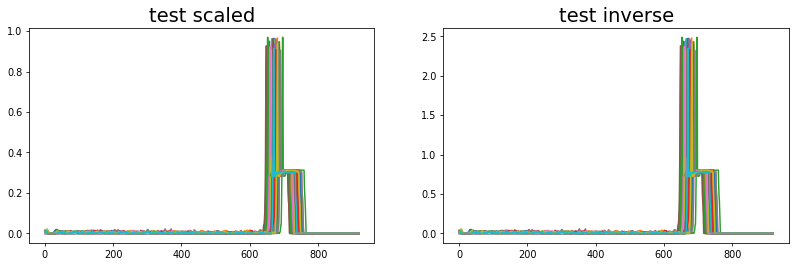

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(14,4), dpi=70)
axs[0].plot(cl0test_scaled.transpose())
axs[1].plot(cl0test_inverse.transpose())

axs[0].set_title("test scaled", fontsize=20)
axs[1].set_title("test inverse", fontsize=20)
fig.show()

In [44]:
feature_test = np.concatenate((cl0test_scaled, cl1test_scaled, cl2test_scaled, cl3test_scaled, cl4test_scaled,
                               cl5test_scaled, cl6test_scaled, cl7test_scaled, 
                               cl16test_scaled, cl24test_scaled, cl27test_scaled, cl35test_scaled, cl37test_scaled,
                               cl267test_scaled, cl357test_scaled), axis=0)
feature_test.shape

(750, 920)

In [45]:
l0test = build_multi_label(shape_list=[50,8], p0=0)
l1test = build_multi_label(shape_list=[50,8], p0=1)
l2test = build_multi_label(shape_list=[50,8], p0=2)
l3test = build_multi_label(shape_list=[50,8], p0=3)
l4test = build_multi_label(shape_list=[50,8], p0=4)
l5test = build_multi_label(shape_list=[50,8], p0=5)
l6test = build_multi_label(shape_list=[50,8], p0=6)
l7test = build_multi_label(shape_list=[50,8], p0=7)

l16test = build_multi_label(shape_list=[50,8], p0=1, p1=6)
l24test = build_multi_label(shape_list=[50,8], p0=2, p1=4)
l27test = build_multi_label(shape_list=[50,8], p0=2, p1=7)
l35test = build_multi_label(shape_list=[50,8], p0=3, p1=5)
l37test = build_multi_label(shape_list=[50,8], p0=3, p1=7)
l267test = build_multi_label(shape_list=[50,8], p0=2, p1=6, p2=7)
l357test = build_multi_label(shape_list=[50,8], p0=3, p1=5, p2=7)

In [46]:
label_test = np.concatenate((l0test, l1test, l2test, l3test, l4test, l5test, l6test, l7test,
                             l16test, l24test, l27test, l35test, l37test,
                             l267test, l357test), axis=0)
label_test.shape

(750, 8)

In [47]:
np.save("feature_label/feature_test_mlc_v2.4.npy", feature_test)

In [48]:
np.save("feature_label/label_test_mlc_v2.4.npy", label_test)